<a href="https://colab.research.google.com/github/2003MADHAV/Traffic_SignsRecognition/blob/main/Traffic_Signs_Recognition_using_CNN_and_Keras_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.image as mpimg
import os
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
#from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow import keras
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from glob import glob
import cv2

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
from zipfile import ZipFile
data_path = '/content/drive/MyDrive/traffic-sign-dataset-classification.zip'
# Check if the path points to a file
if os.path.isfile(data_path):
    with ZipFile(data_path, 'r') as zip:
        zip.extractall()
else:
    print(f"The specified path '{data_path}' does not point to a valid zip file.")

The specified path '/content/drive/MyDrive/traffic-sign-dataset-classification.zip' does not point to a valid zip file.


In [ ]:
# path to the folder containing our dataset
dataset = '/content/drive/MyDrive/trafic_sign_project/DATA'

# path of label file
labelfile = pd.read_csv('/content/drive/MyDrive/trafic_sign_project/labels.csv')


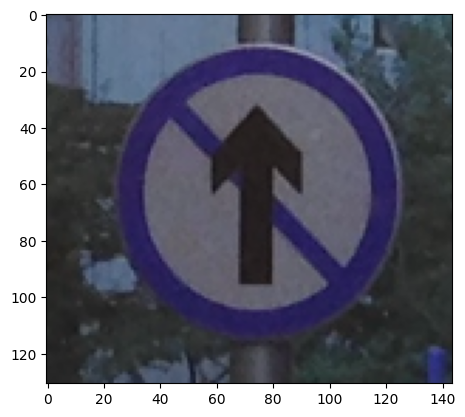

In [ ]:

# Visualize some images from the dataset
img = cv2.imread("/content/drive/MyDrive/trafic_sign_project/DATA/10/010_0001.png")
plt.imshow(img)


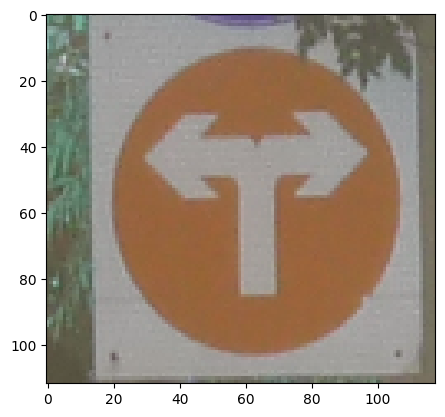

In [ ]:
img = cv2.imread("/content/drive/MyDrive/trafic_sign_project/DATA/23/023_0001.png")
plt.imshow(img)


In [ ]:
labelfile.head()


,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [ ]:
labelfile.tail()


,ClassId,Name
53,53,Give Way
54,54,No stopping
55,55,No entry
56,56,Unknown7
57,57,Unknown8


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
															subset='training',
															image_size=(
																224, 224),
															seed=123,
															batch_size=32)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
															subset='validation',
															image_size=(
																224, 224),
															seed=123,
															batch_size=32)


Found 4190 files belonging to 58 classes.
Using 3352 files for training.
Found 4190 files belonging to 58 classes.
Using 838 files for validation.


In [ ]:
class_numbers = train_ds.class_names
class_names = []

for i in class_numbers:
    try:
        index = int(i)
        class_names.append(labelfile['Name'][index])
    except ValueError:
        # Handle non-numeric values (e.g., 'DATA') here, if needed
        pass

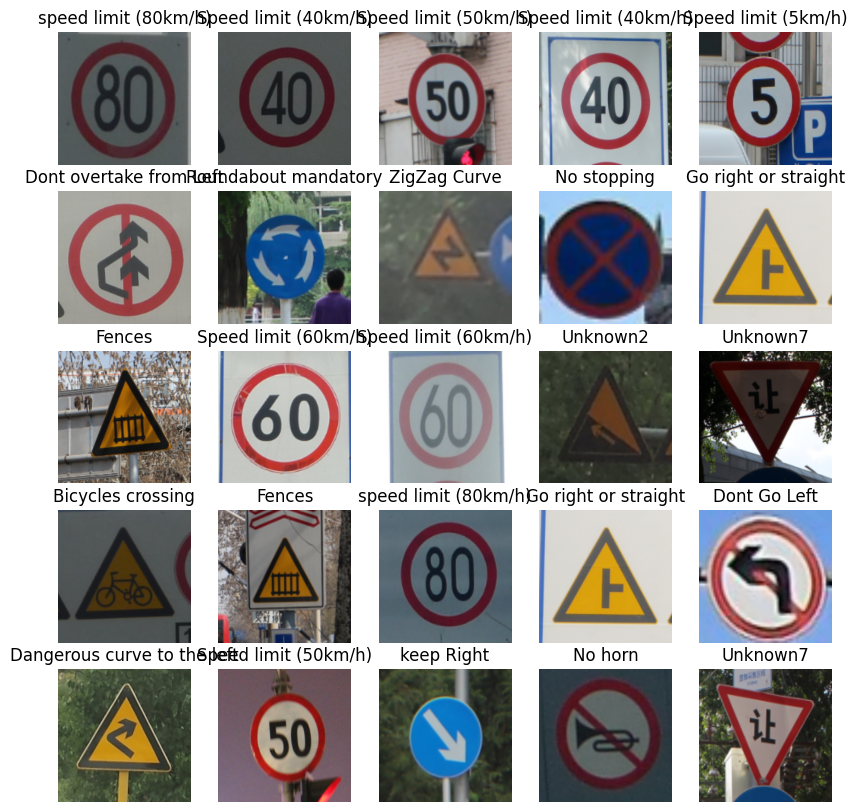

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(min(25, len(labels))):  # Limit to the length of labels or 25, whichever is smaller
        ax = plt.subplot(5, 5, i + 1)
        # Check if the label index is within the valid range of class_names
        if labels[i] < len(class_names):
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
        else:
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title("Unknown")
        plt.axis("off")

plt.show()

In [ ]:
data_augmentation = tf.keras.Sequential(
	[
		tf.keras.layers.experimental.preprocessing.RandomFlip(
			"horizontal", input_shape=(224, 224, 3)),
		tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
		tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
		tf.keras.layers.experimental.preprocessing.RandomFlip(
			mode="horizontal_and_vertical")
	]
)

In [ ]:
model = Sequential()
model.add(data_augmentation)
model.add(Rescaling(1./255))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(labelfile), activation='softmax'))


In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

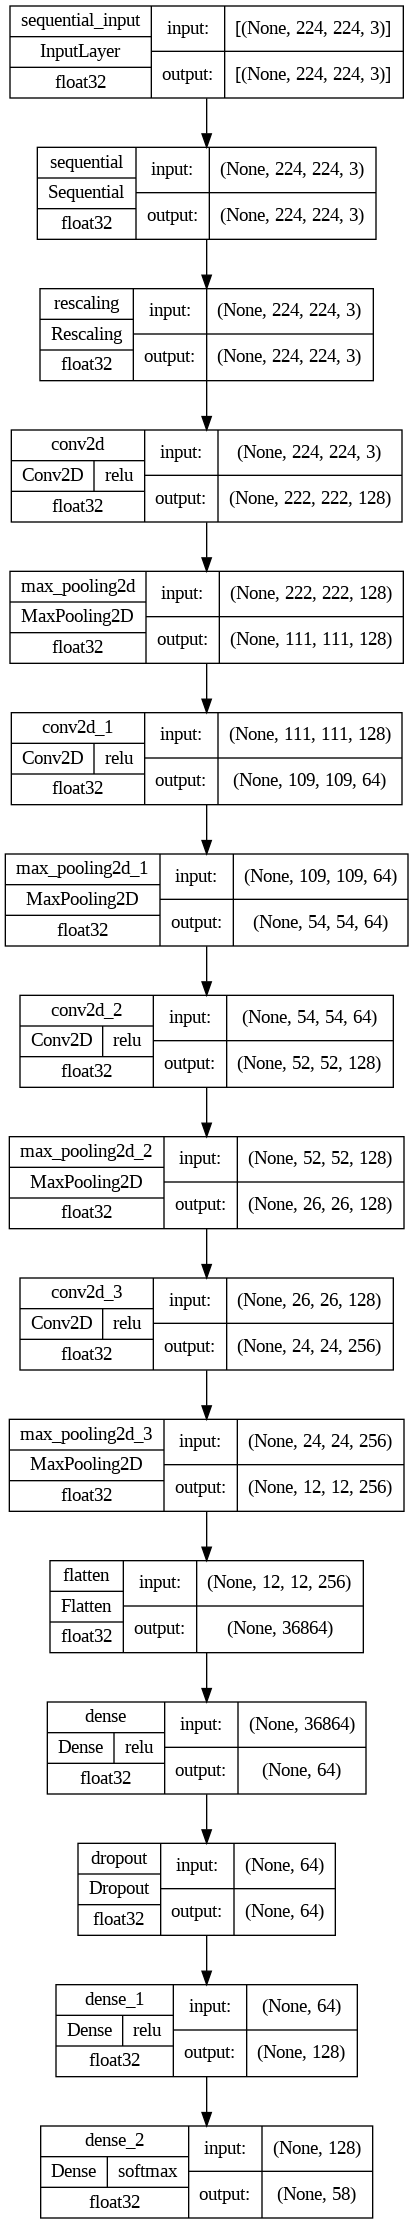

In [ ]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
			optimizer='adam',
			metrics=['accuracy'])


In [ ]:
pip install --upgrade matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 34.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
# Set callback functions to early stop training
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]
history = model.fit(train_ds,
				validation_data=val_ds,
				epochs=50,
				callbacks=mycallbacks)

Epoch 1/50
105/105 [==============================] - 1122s 11s/step - loss: 1.5066 - accuracy: 0.5125 - val_loss: 1.1503 - val_accuracy: 0.6408
Epoch 2/50
105/105 [==============================] - 1125s 11s/step - loss: 1.4106 - accuracy: 0.5424 - val_loss: 1.0928 - val_accuracy: 0.6504
Epoch 3/50
105/105 [==============================] - 1123s 11s/step - loss: 1.3279 - accuracy: 0.5644 - val_loss: 0.9525 - val_accuracy: 0.7160
Epoch 4/50
105/105 [==============================] - 1091s 10s/step - loss: 1.1904 - accuracy: 0.6190 - val_loss: 0.8674 - val_accuracy: 0.7112
Epoch 5/50
105/105 [==============================] - 1086s 10s/step - loss: 1.1078 - accuracy: 0.6366 - val_loss: 0.8141 - val_accuracy: 0.7422
Epoch 6/50
105/105 [==============================] - 1102s 10s/step - loss: 1.0309 - accuracy: 0.6614 - val_loss: 0.7092 - val_accuracy: 0.7673
Epoch 7/50
105/105 [==============================] - 1088s 10s/step - loss: 0.9954 - accuracy: 0.6697 - val_loss: 0.7240 - val_ac

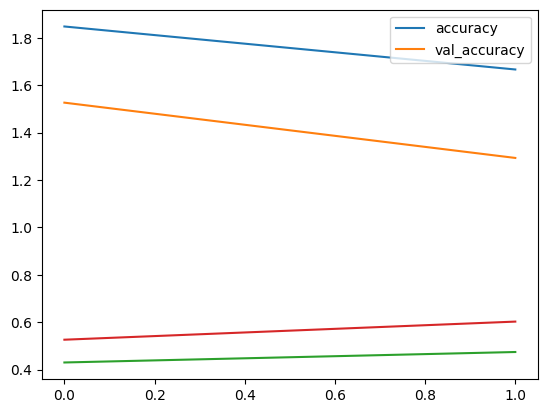

In [ ]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper right')

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')



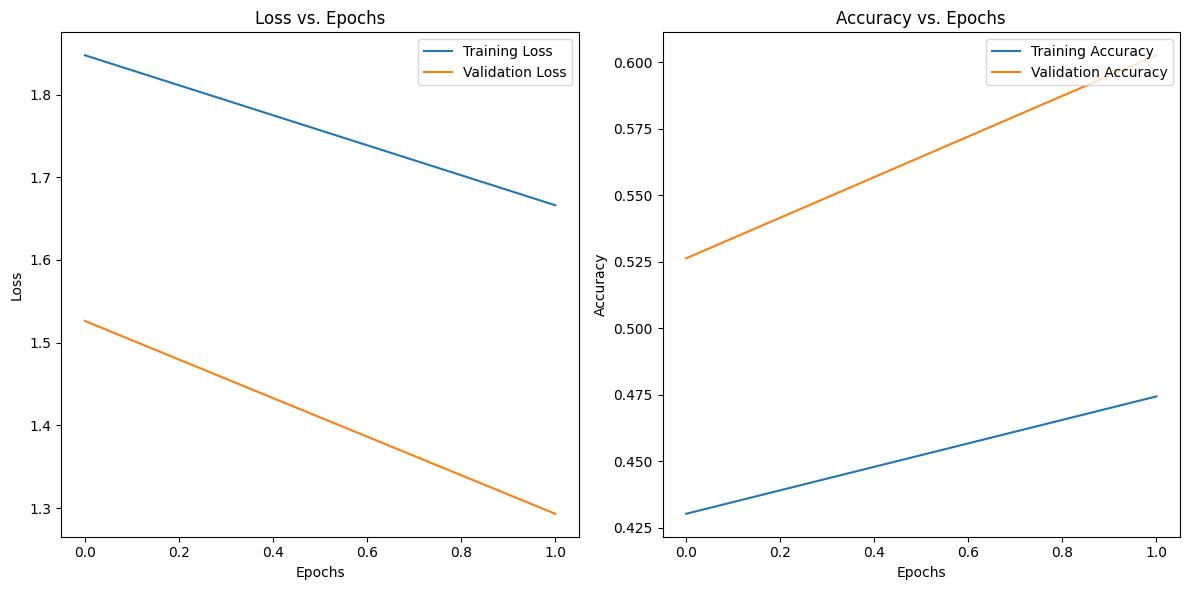

In [ ]:

import matplotlib.pyplot as plt

# Create two separate figures for the two plots
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed for your display

# Plot Loss vs. Val_loss
plt.subplot(1, 2, 1)  # Create a subplot for the loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')

# Plot Accuracy vs. Val_accuracy
plt.subplot(1, 2, 2)  # Create a subplot for the accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')

plt.tight_layout()  # Ensures proper spacing between subplots (optional)
plt.show()

